In [1]:
import csv
content_ls = []
with open('Data/City_Zri_AllHomes.csv', 'r') as csvfile:
    r = csv.reader(csvfile)
    for row in r:
        content_ls.append(row)

In [12]:
key_list = content_ls[0]
content= content_ls[1:]

In [30]:
len(content)

13123

In [13]:
key_list[:6]

['RegionID', 'RegionName', 'State', 'Metro', 'CountyName', 'SizeRank']

In [14]:
import collections
content_preprocessed = []
for line in content:
    temp_dict = {}
    temp_dict['type'] = 'studio'
    for key, value in zip(key_list, line):
        temp_dict[key] = value
    content_preprocessed.append(temp_dict)

In [19]:
###########################formatted data from csv file for studio###############
data = content_preprocessed
key_list = list(data[0].keys())
attr = list(key_list[:7])
months = key_list[7: len(key_list)]

In [20]:
print(key_list)
print(attr)
print(months)

['type', 'RegionID', 'RegionName', 'State', 'Metro', 'CountyName', 'SizeRank', '2010-11', '2010-12', '2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06', '2011-07', '2011-08', '2011-09', '2011-10', '2011-11', '2011-12', '2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06', '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2012-12', '2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06', '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12', '2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06', '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12', '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06', '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12', '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12', '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10

In [21]:
######## convert string to floats for the rent,
######## and fill in the empty data with previous closest non 0 value
for d in data:
    for m in months:
        if d[m] != '':
            d[m] = float(d[m])
        else:
            d[m] = 0
    for m in months:
        if d[m] == 0:
            d[m] = d[months[months.index(m) - 1]]

In [22]:
#############check the rent change over months among recent years for studio ############
import numpy as np
month_average = {}
for month in months:
    month_average[month] = np.mean([i[month] for i in data if i['CountyName'] != 'San Diego'])

In [23]:
sd_info = [d for d in data if d['CountyName'] == 'San Diego']
sd_month_ = [sd_info[0][month] for month in months]
print(data.index(sd_info[0]))

8


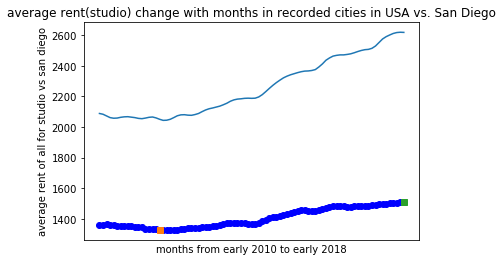

low: 2012-04 1326.88730134
high: 2018-01 1507.59909841


In [24]:
import matplotlib.pyplot as plt
import numpy as np
plt.title('average rent(studio) change with months in recorded cities in USA vs. San Diego')
r = [month_average[i] for i in month_average]
x = range(len(months))
plt.plot(x,r,'bo')
plt.plot(x,sd_month_)
i_min = r.index(min(r))
i_max = r.index(max(r))
plt.plot(i_min, min(r), marker = 's')
plt.plot(i_max, max(r), marker = 's')
frame = plt.gca()
### hide the x values
frame.axes.get_xaxis().set_ticks([])
plt.xlabel("months from early 2010 to early 2018")
plt.ylabel("average rent of all for studio vs san diego")
plt.show()
print("low: %s %s"%(months[i_min], r[i_min]))
print("high: %s %s"%(months[i_max], r[i_max]))
######################
#for san diego, the data from 2010 to end of 2014, which appears all the same on the graph
#as we select the previous rent to replace the missing data

In [25]:
#### from the graph, we can see the drop from 2010 to early 2013#########

In [32]:
counties = set([d['CountyName'] for d in data])

In [34]:
counties

{'Lake',
 'Madison',
 'Anchorage',
 'Rutherford',
 'Cascade',
 'Finney',
 'Cecil',
 'Wharton',
 'Walla Walla',
 'Lubbock',
 'Fond du Lac',
 'Sauk',
 'Sac',
 'Clayton',
 'Hendry',
 'San Benito',
 'Santa Clara',
 'Westchester',
 'Norfolk',
 'Latah',
 'Stewart',
 'Multnomah',
 'Doniphan',
 'Yolo',
 'Fayette',
 'Ashe',
 'Iberville',
 'Montour',
 'Cleveland',
 'Otter Tail',
 'Genesee',
 'Fluvanna',
 'Tompkins',
 'Saint Landry',
 'Clark',
 'Giles',
 'Henrico',
 'Skagit',
 'Scurry',
 'Colorado',
 'Ford',
 'Coles',
 'Craighead',
 'Brevard',
 'Kit Carson',
 'Sebastian',
 'Anne Arundel',
 'Bowie',
 'Levy',
 'Elko',
 'Hampshire',
 'Penobscot',
 'Guilford',
 'Jerome',
 'Smyth',
 'Adair',
 'Bryan',
 'Elkhart',
 'Bastrop',
 'Volusia',
 'Hood River',
 'Waupaca',
 'Arapahoe',
 'Outagamie',
 'Chenango',
 'Broadwater',
 'Saint Clair',
 'Yamhill',
 'Kane',
 'Cerro Gordo',
 'Red Willow',
 'Hinds',
 'Nevada',
 'San Jacinto',
 'Buckingham',
 'Johnson',
 'Kewaunee',
 'McLean',
 'Morgan',
 'Manistee',
 'Yello

In [38]:
new_data = []
for i in counties:
    temp = [d for d in data if d['CountyName'] == i]
    size = sum([int(d['SizeRank']) for d in temp])/len(temp)
    rent = sum([d[months[-1]] for d in temp])/len(temp)
    new_data.append({'CountyName': i, 'SizeRank': size, 'Rent': rent})

In [39]:
new_data

[{'CountyName': 'Lake',
  'Rent': 1659.117117117117,
  'SizeRank': 6135.963963963964},
 {'CountyName': 'Madison',
  'Rent': 1064.7215189873418,
  'SizeRank': 7553.658227848101},
 {'CountyName': 'Anchorage', 'Rent': 1909.0, 'SizeRank': 63.0},
 {'CountyName': 'Rutherford',
  'Rent': 1185.8823529411766,
  'SizeRank': 7129.588235294118},
 {'CountyName': 'Cascade',
  'Rent': 1191.3333333333333,
  'SizeRank': 7405.666666666667},
 {'CountyName': 'Finney', 'Rent': 1107.0, 'SizeRank': 6981.0},
 {'CountyName': 'Cecil', 'Rent': 1366.1, 'SizeRank': 7387.6},
 {'CountyName': 'Wharton', 'Rent': 1292.4, 'SizeRank': 6935.4},
 {'CountyName': 'Walla Walla', 'Rent': 1343.0, 'SizeRank': 5479.0},
 {'CountyName': 'Lubbock', 'Rent': 1204.3333333333333, 'SizeRank': 6353.0},
 {'CountyName': 'Fond du Lac',
  'Rent': 884.4444444444445,
  'SizeRank': 9277.777777777777},
 {'CountyName': 'Sauk', 'Rent': 1191.142857142857, 'SizeRank': 9049.0},
 {'CountyName': 'Sac',
  'Rent': 881.3333333333334,
  'SizeRank': 10017.33

2018-01
1232


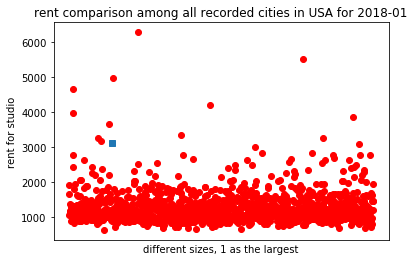

In [52]:
################# looking into details of the cities##############
### does the size of the region matters?
#### pick two months month and plot size against rent
selected_month1 = months[-1]
#selected_month2 = months[-10]
#selected_month3 = months[0]
print("%s" %(selected_month1))
sizes = [d['SizeRank'] for d in new_data]
rent = [d['Rent'] for d in new_data]
print(len(rent))
#rent2 = [d[selected_month2] for d in data]
#print(len(rent2))
#rent3 = [float(d[selected_month3]) for d in data]
#print(len(rent3))
sd = [d for d in new_data if d['CountyName'] == 'San Diego']
markers_on = [sd[0]['SizeRank']] ## for san diego

plt.title('rent comparison among all recorded cities in USA for %s'%selected_month1)
#plt.plot(rent3, 'bs')
#plt.plot(rent2, 'g^')

plt.plot(rent, 'ro')
plt.plot(sizes.index(sd[0]['SizeRank']),rent[new_data.index(sd[0])],  marker = 's')
x = np.array(range(len(sizes)))
plt.xticks(x, sizes)
frame = plt.gca()
### hide the x values
frame.axes.get_xaxis().set_ticks([])
plt.xlabel("different sizes, 1 as the largest")
plt.ylabel("rent for studio")
plt.show()
######
# we can see from the graph that san diego's rent prize is not very high

In [51]:
######## we can see that size actually does not matter very much ###########
max(rent)
info1 = new_data[rent.index(max(rent))]
print(info1['CountyName'], info1['Rent'])

Marin 6271.0


In [115]:
###display the most expensive cities in a list after the view on the graph#########
cities_info = [(d['Metro'], d['RegionName'], d['State'], d['SizeRank'], d['2018-01']) for d in data]
def getKey(item):
    return item[4]
sorted(cities_info, key=getKey, reverse=True)

[('Naples', 'Naples', 'FL', '293', 3950.0),
 ('Washington', 'Potomac', 'MD', '280', 3650.0),
 ('San Francisco', 'San Francisco', 'CA', '11', 3026.0),
 ('Miami-Fort Lauderdale', 'Weston', 'FL', '205', 2862.5),
 ('Miami-Fort Lauderdale', 'Boca Raton', 'FL', '66', 2700.0),
 ('New York', 'West Orange', 'NJ', '255', 2700.0),
 ('New York', 'Bernards Township', 'NJ', '344', 2675.0),
 ('New York', 'Huntington', 'NY', '397', 2675.0),
 ('New York', 'Parsippany-Troy Hills Township', 'NJ', '239', 2600.0),
 ('Miami-Fort Lauderdale', 'Miramar', 'FL', '103', 2550.0),
 ('New York', 'Hoboken', 'NJ', '244', 2512.5),
 ('Phoenix', 'Fountain Hills', 'AZ', '368', 2500.0),
 ('Miami-Fort Lauderdale', 'Davie', 'FL', '129', 2480.0),
 ('Miami-Fort Lauderdale', 'Coral Springs', 'FL', '105', 2475.0),
 ('New York', 'Long Beach', 'NY', '338', 2450.0),
 ('New York', 'Morristown', 'NJ', '377', 2437.5),
 ('Austin', 'Lakeway', 'TX', '413', 2400.0),
 ('Miami-Fort Lauderdale', 'Plantation', 'FL', '136', 2385.0),
 ('Miami-